## LDA(Linear Discriminant Analysis)         p.393~
- 분류(지도학습) 에서 사용하기 쉽도록 한 알고리즘
- LDA 는 입력데이터의 "결정값 클래스"를 최대한으로 분리할 수 있는 축을 찾는다

### 즉 PCA 는 엄밀히 말하면 비지도 학습, LDA 는 지도학습이라고 볼수있다

### 붓꽃 데이터 세트에 LDA 적용하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [6]:
iris_data = load_iris()
iris_scaled = StandardScaler().fit_transform(iris_data.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
# LDA 사용시 -> 분류(지도학습) 판별 -> 답(레이블)을 같이 넣어줘야 한다.
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris_data.target)
iris_data_lda = lda.transform(iris_scaled)
print(iris_data_lda.shape)

(150, 2)


In [8]:
# 시각화

# LDA 적용된 데이터로 Dataframe 생성
iris_df_lda = pd.DataFrame(iris_data_lda, columns=['com1','com2'])
iris_df_lda['TARGET'] = iris_data.target

iris_df_lda.head()

,com1,com2,TARGET
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


In [9]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

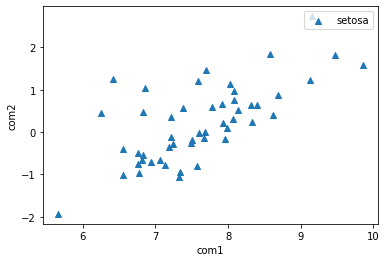

In [10]:
# 각 target 별로 다른 shape 으로 scatter plot
x_axis_data = iris_df_lda[iris_df_lda['TARGET']==0]['com1']
y_axis_data = iris_df_lda[iris_df_lda['TARGET']==0]['com2']

plt.scatter(x_axis_data, y_axis_data, marker='^', label=iris_data.target_names[0])
plt.legend(loc='upper right')
plt.xlabel('com1')
plt.ylabel('com2')
plt.show()


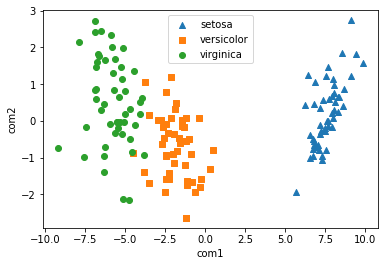

In [15]:
# setosa는 세모, versicolor는 사각형, virginica 는 원형으로 표현
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda['TARGET']==i]['com1']
    y_axis_data = iris_df_lda[iris_df_lda['TARGET']==i]['com2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris_data.target_names[i])

plt.legend(loc='best')
plt.xlabel('com1')
plt.ylabel('com2')
plt.show()

분류가 전에 PCA적용한 것보다 잘 되어있다.

랜덤 포레스트 분류 돌려보기

In [25]:
# LDA 적용되지 않은 원본데이터의 정확도 출력
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=156)  # n_estimator 디폴트 : 100
scores = cross_val_score(
    rf_clf
    ,iris_data.data
    ,iris_data.target
    , scoring='accuracy'
    , cv=5
)

mean_score = np.mean(scores)
print('각 정확도: ', np.round(scores, 4))
print('평균 정확도: ', np.round(mean_score, 4))

각 정확도:  [0.9667 0.9667 0.9333 0.9    1.    ]
평균 정확도:  0.9533


In [33]:
# LDA 적용된 데이터의 정확도
rf_clf = RandomForestClassifier(random_state=156)  # n_estimator 디폴트 : 100
scores = cross_val_score(
    rf_clf
    ,iris_df_lda.iloc[:,:2]
    ,iris_df_lda.iloc[:,-1]
    , scoring='accuracy'
    , cv=5
)

mean_score = np.mean(scores)
print('각 정확도: ', np.round(scores, 4))
print('평균 정확도: ', np.round(mean_score, 4))

각 정확도:  [1.     1.     0.9    0.9333 1.    ]
평균 정확도:  0.9667


기본적으로 붓꽃 데이터 자체가 많은 전처리 없이도 높은 정확도를 출력하므로,여기서는 큰 의미는 없었다.

- 그러나 지도학습의 분류문제에 있어서 피처가 많고, 데이터 양이 많아지면 LDA 는 강력한 툴이 될수있다.